# iStar pixel to spot comparison

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
import os
# path = '/home/lingyu/data/users/yuanhua/stData/istar/data/demo'    # For SVGs
path = '/mnt/lingyu/nfs_share2/Python/iSTAR/istar-master/data/demo_LRgene/'    # For HVGs
os.chdir(str(path))

## Original spots

In [4]:
import pandas as pd
df = pd.read_csv('cnts.tsv', sep='\t', index_col=0)
df

,FO538757.1,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,F8,FUNDC2,BRCC3,VBP1,CLIC2,SPRY3,VAMP7,USP9Y,TMSB4Y,NLGN4Y
spot,,,,,,,,,,,,,,,,,,,,,
10x10,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
10x11,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
10x12,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10x13,0,0,0,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
10x14,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9x24,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9x25,0,0,0,0,0,0,1,3,1,0,...,0,1,0,1,0,0,0,0,0,0


In [5]:
# LRgene = pd.read_csv('/mnt/lingyu/nfs_share2/Python/FineST/FineST/Dataset/LRgene/LRgene_CellChatDB_baseline.csv')
# lr_gene_list = LRgene['LR gene'].tolist()
# feature_names = np.array(df.columns)
# available_genes = pd.DataFrame([gene for gene in lr_gene_list if gene in feature_names])
# print(available_genes.shape)
# available_genes.to_csv("/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/Demo/LRgene-names.txt", sep='\t', index=False, header=False)

In [6]:
locs = pd.read_csv('locs.tsv', sep='\t', index_col=0)
locs

,x,y
spot,,
10x10,7080,6824
10x11,7075,6463
10x12,7076,6098
10x13,7063,5733
10x14,7069,5373
...,...,...
9x23,7407,2085
9x24,7401,1720
9x25,7432,1351


In [7]:
np.mean(df.index.values == locs.index.values)

1.0

## Image embedding

In [8]:
import pickle

with open('embeddings-hist.pickle', 'rb') as f:
    hist_emb = pickle.load(f)

In [9]:
for key in hist_emb.keys():
    print(key, len(hist_emb['cls']), hist_emb['cls'][0].shape)

cls 192 (528, 704)
sub 192 (528, 704)
rgb 192 (528, 704)


**Example gene**

In [10]:
import pickle

with open('cnts-super/ERBB2.pickle', 'rb') as f:
    data = pickle.load(f)

In [11]:
data

array([[0.0303345 , 0.03048827, 0.03051112, ..., 0.03119624, 0.03119624,
        0.03119624],
       [0.03026222, 0.03045656, 0.03050082, ..., 0.03119624, 0.03119624,
        0.03119624],
       [0.03015493, 0.03033287, 0.03037185, ..., 0.03119624, 0.03119624,
        0.03119624],
       ...,
       [0.03119624, 0.03119624, 0.03119624, ..., 0.03119624, 0.03119624,
        0.03119624],
       [0.03119624, 0.03119624, 0.03119624, ..., 0.03119624, 0.03119624,
        0.03119624],
       [0.03119624, 0.03119624, 0.03119624, ..., 0.03119624, 0.03119624,
        0.03119624]], dtype=float32)

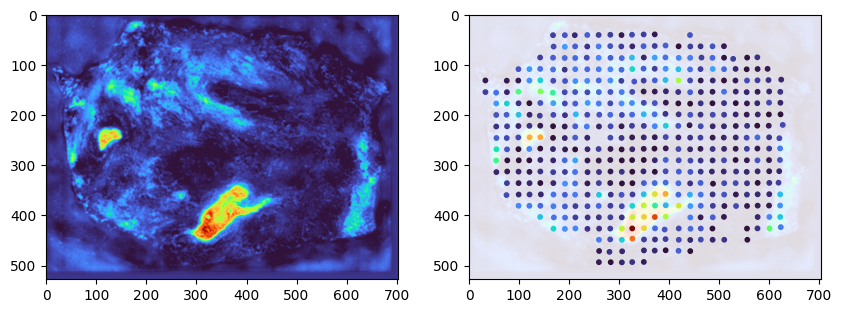

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
imgplot = plt.imshow(data, cmap='turbo')

plt.subplot(1, 2, 2)
imgplot = plt.imshow(data, cmap='turbo', alpha=0.15)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=df['ERBB2'], cmap='turbo', s=10)
# plt.gca().invert_yaxis()

plt.show()

## Aggregating imputed pixels
16 pixels for one sub-spot

**<span style="color:red"> The `x` and `y` swapped when aggregating the imputation</span>**

In [13]:
def image_to_spot(image, spot_locs, ppi=16, redius=100):
    """
    Note, the aggregation is very coarse by using the index below
    """
    spot_idx = spot_locs / ppi
    redius_idx = redius / ppi
    
    spot_value = np.zeros(spot_locs.shape[0])
    for i in range(len(spot_value)):
        # print(int(spot_idx[i, 0] - redius_idx), int(spot_idx[i, 0] + redius_idx),
        #       int(spot_idx[i, 1] - redius_idx), int(spot_idx[i, 1] + redius_idx))
        
        spot_value[i] = np.sum(image[
            int(spot_idx[i, 0] - redius_idx) : int(spot_idx[i, 0] + redius_idx),
            int(spot_idx[i, 1] - redius_idx) : int(spot_idx[i, 1] + redius_idx)
        ])
        
    return spot_value

In [14]:
# Note, we need to swap the x and y!!!
imputed_value = image_to_spot(data, locs.values[:, [1, 0]])

PearsonRResult(statistic=0.907960465287155, pvalue=6.302967140057899e-168)


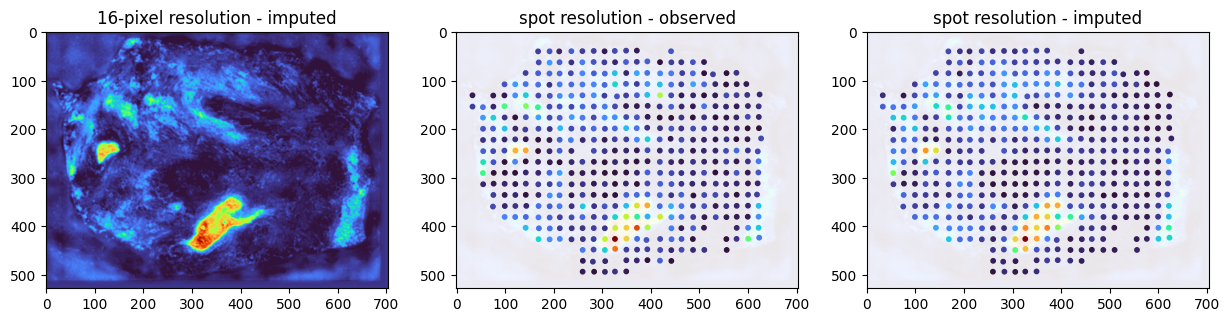

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
fig = plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
imgplot = plt.imshow(data, cmap='turbo', alpha=1.0)
plt.title('16-pixel resolution - imputed')

plt.subplot(1, 3, 2)
imgplot = plt.imshow(data, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=df['ERBB2'], cmap='turbo', s=10)
plt.title('spot resolution - observed')
# plt.gca().invert_yaxis()

plt.subplot(1, 3, 3)
imgplot = plt.imshow(data, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=imputed_value, cmap='turbo', s=10)
plt.title('spot resolution - imputed')
# plt.gca().invert_yaxis()
print(st.pearsonr(df['ERBB2'].values, imputed_value))

plt.show()

In [16]:
svg_list = pd.read_csv('gene-names.txt', header=None)
df_svg = df[svg_list.values[:, 0]]

In [17]:
svg_list

,0
0,TGFB1
1,TGFBR1
2,TGFBR2
3,TGFB2
4,TGFB3
...,...
642,SEMA7A
643,PLXNC1
644,SIGLEC1
645,THY1


In [18]:
import pickle

df_imp = df_svg.copy()
for gene in df_imp.columns:
    with open('cnts-super/%s.pickle' %(gene), 'rb') as f:
        imputed_data = pickle.load(f)
    
    imputed_spot = image_to_spot(imputed_data, locs.values[:, [1, 0]])
    df_imp[gene] = imputed_spot

In [19]:
df_svg

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
spot,,,,,,,,,,,,,,,,,,,,,
10x10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
10x11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10x12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,4,0
10x13,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
10x14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
9x24,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
9x25,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [20]:
pd.DataFrame(df_imp)

,TGFB1,TGFBR1,TGFBR2,TGFB2,TGFB3,ACVR1B,ACVR1C,ACVR1,BMP2,BMPR1A,...,SEMA6D,KDR,TREM2,SEMA6A,SEMA6B,SEMA7A,PLXNC1,SIGLEC1,THY1,VCAM1
spot,,,,,,,,,,,,,,,,,,,,,
10x10,0.311986,0.046433,0.034789,0.010928,0.077390,0.031261,0.021151,0.023197,0.010442,0.022677,...,0.010796,0.010893,0.035560,0.010615,0.057342,0.024882,0.023176,0.056132,0.890620,0.033400
10x11,0.526584,0.054070,0.046348,0.012740,0.044343,0.036988,0.024743,0.027927,0.012199,0.026374,...,0.012680,0.012950,0.041095,0.012588,0.049072,0.044009,0.026894,0.044904,0.916068,0.039581
10x12,0.774897,0.057691,0.085693,0.011406,0.138207,0.034250,0.021897,0.164679,0.011204,0.024698,...,0.011005,0.011271,0.036962,0.011679,0.132800,0.029285,0.025667,0.025825,0.847388,0.036210
10x13,0.709034,0.046285,0.077406,0.011111,0.075447,0.031875,0.020521,0.072789,0.009895,0.021865,...,0.010415,0.011136,0.044122,0.010556,0.072944,0.053287,0.036328,0.037358,0.844542,0.034122
10x14,0.303756,0.054534,0.039874,0.013186,0.040678,0.037641,0.025140,0.027428,0.011788,0.025677,...,0.012869,0.013044,0.041164,0.012623,0.028287,0.027990,0.026647,0.032677,0.399468,0.039429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,0.484090,0.095269,0.080986,0.016654,0.144170,0.032775,0.022868,0.103514,0.011383,0.055328,...,0.011184,0.012379,0.036829,0.010566,0.027947,0.027513,0.033622,0.100086,1.931651,0.035564
9x24,0.271971,0.076158,0.114320,0.011392,0.046454,0.032248,0.020744,0.064460,0.010814,0.090569,...,0.010714,0.010783,0.053550,0.010012,0.023095,0.024006,0.031488,0.024959,1.226479,0.032712
9x25,0.408138,0.047429,0.062351,0.011280,0.065723,0.031676,0.020253,0.089747,0.010500,0.037637,...,0.010716,0.010678,0.102863,0.009792,0.023026,0.030545,0.026302,0.056839,1.528576,0.033034


Column EREG is constant in one of the dataframes, skipping.
Column CXCL11 is constant in one of the dataframes, skipping.
Column XCR1 is constant in one of the dataframes, skipping.
Column TSLP is constant in one of the dataframes, skipping.
Column IL12RB2 is constant in one of the dataframes, skipping.
Column IL20 is constant in one of the dataframes, skipping.
Column EPO is constant in one of the dataframes, skipping.
Column GH1 is constant in one of the dataframes, skipping.
Column THPO is constant in one of the dataframes, skipping.
Column EDA is constant in one of the dataframes, skipping.
Column HCRTR2 is constant in one of the dataframes, skipping.
Column SSTR3 is constant in one of the dataframes, skipping.
Column CTSG is constant in one of the dataframes, skipping.
Column MARCO is constant in one of the dataframes, skipping.
Column COL2A1 is constant in one of the dataframes, skipping.
Column COL6A6 is constant in one of the dataframes, skipping.
Column VTN is constant in one 

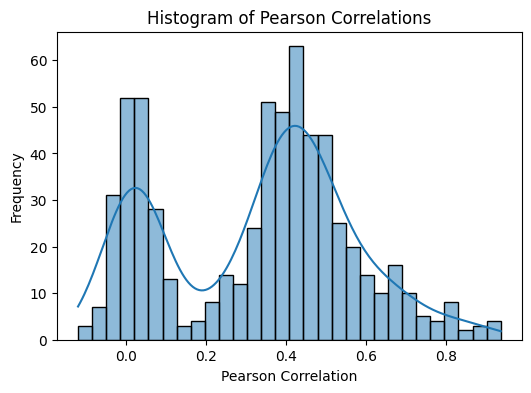

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_svg = df_svg.dropna(axis=1, how='any')
df_imp = df_imp.dropna(axis=1, how='any')

common_columns = df_svg.columns.intersection(df_imp.columns)
df_svg = df_svg[common_columns]
df_imp = df_imp[common_columns]

pearson_correlations = []
for col in df_svg.columns:
    if df_svg[col].nunique() > 1 and df_imp[col].nunique() > 1:  
        corr = st.pearsonr(df_svg[col].values, df_imp[col].values)[0]
        pearson_correlations.append(corr)
    else:
        print(f"Column {col} is constant in one of the dataframes, skipping.")

if pearson_correlations:
    print(np.mean(pearson_correlations))
else:
    print("No valid Pearson correlations were calculated.")

plt.figure(figsize=(6, 4))
sns.histplot(data=pearson_correlations, bins=30, kde=True)
plt.title("Histogram of Pearson Correlations")
plt.xlabel("Pearson Correlation")
plt.ylabel("Frequency")
plt.show()


In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

def cor_hist(adata, adata_df_infer, max_step=0.1, min_step=0.01,
             fig_size=(5, 4), trans=False, format='svg', save_path=None, label_fontsize=14, tick_fontsize=12):
    # Check if input is AnnData or DataFrame and handle accordingly
    if isinstance(adata, pd.DataFrame):
        pearson_correlations = [stats.pearsonr(adata[col].values, adata_df_infer[col].values)[0] for col in adata.columns]
    else:
        pearson_correlations = [stats.pearsonr(adata.to_df()[col].values, adata_df_infer[col].values)[0] for col in adata.to_df().columns]
    
    print(np.mean(pearson_correlations))

    fig = plt.figure(figsize=fig_size)
    ax = sns.histplot(data=pearson_correlations, bins=30, kde=True)
    ax.xaxis.set_major_locator(MultipleLocator(max_step))
    ax.xaxis.set_minor_locator(MultipleLocator(min_step))
    plt.title("Histogram of Pearson Correlations", fontsize=label_fontsize)
    plt.xlabel("Pearson Correlation", fontsize=label_fontsize)
    plt.ylabel("Frequency", fontsize=label_fontsize)
    
    # Change tick label font size
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=tick_fontsize)

    if save_path is not None:
        plt.savefig(save_path, transparent=trans, format=format, dpi=300, bbox_inches='tight')
    plt.show()

/mnt/lingyu/nfs_share2/env/envs/istar/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


nan


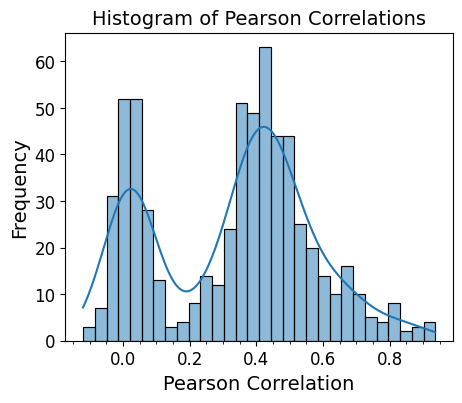

In [24]:
cor_hist(df_svg, df_imp, max_step=0.2, min_step=0.05,
                 fig_size=(5, 4), trans=True, format='svg',
                save_path=None)
                 # save_path='/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/Demo/Hist_infer_cor_count_iStar_647LRgs.svg')

## Visualizing gene

In [21]:
import pickle

with open('cnts-super/ERBB2.pickle', 'rb') as f:
    data_CD70 = pickle.load(f)
with open('cnts-super/CD27.pickle', 'rb') as f:
    data_CD27 = pickle.load(f)

In [22]:
# Note, we need to swap the x and y!!!
imputed_value_CD70 = image_to_spot(data_CD70, locs.values[:, [1, 0]])
imputed_value_CD27 = image_to_spot(data_CD27, locs.values[:, [1, 0]])
print(imputed_value_CD70.shape)

(441,)


In [23]:
pwd

'/mnt/lingyu/nfs_share2/Python/iSTAR/istar-master/data/demo_LRgene'

PearsonRResult(statistic=0.907960465287155, pvalue=6.302967140057899e-168)


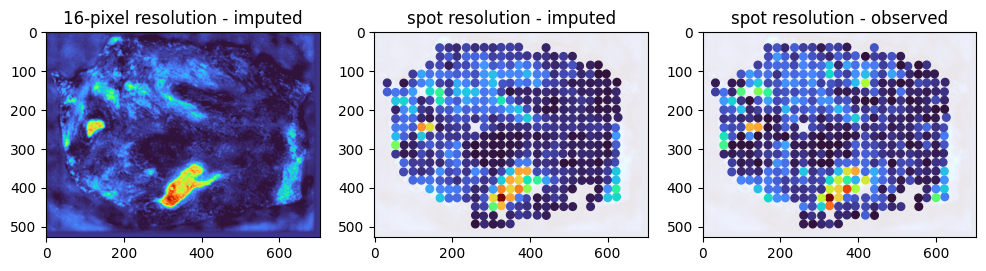

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
imgplot = plt.imshow(data_CD70, cmap='turbo', alpha=1.0)
plt.title('16-pixel resolution - imputed')

plt.subplot(1, 3, 3)
imgplot = plt.imshow(data_CD70, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=df['ERBB2'], cmap='turbo', s=30)
plt.title('spot resolution - observed')
# plt.gca().invert_yaxis()

plt.subplot(1, 3, 2)
imgplot = plt.imshow(data_CD70, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=imputed_value_CD70, cmap='turbo', s=30)
plt.title('spot resolution - imputed')
# plt.gca().invert_yaxis()
print(st.pearsonr(df['ERBB2'].values, imputed_value_CD70))
plt.savefig("Gene_iStar_ERBB2.pdf", format='pdf')
plt.show()

PearsonRResult(statistic=0.5845908137197092, pvalue=8.89294926913592e-42)


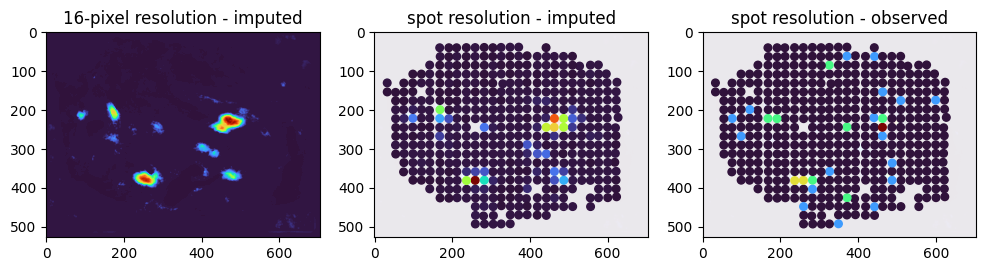

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
imgplot = plt.imshow(data_CD27, cmap='turbo', alpha=1.0)
plt.title('16-pixel resolution - imputed')

plt.subplot(1, 3, 3)
imgplot = plt.imshow(data_CD27, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=df['CD27'], cmap='turbo', s=30)
plt.title('spot resolution - observed')
# plt.gca().invert_yaxis()

plt.subplot(1, 3, 2)
imgplot = plt.imshow(data_CD27, cmap='turbo', alpha=0.1)
plt.scatter(locs['x'].values/16, locs['y'].values/16, 
            c=imputed_value_CD27, cmap='turbo', s=30)
plt.title('spot resolution - imputed')
# plt.gca().invert_yaxis()
print(st.pearsonr(df['CD27'].values, imputed_value_CD27))
plt.savefig("Gene_iStar_CD27.pdf", format='pdf')
plt.show()

## Check H&E images

In [16]:
8448/528, 11264/704

(16.0, 16.0)

/ssd/users/yuanhua/envs/PyTch/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (95158272 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(8448, 11264, 3)


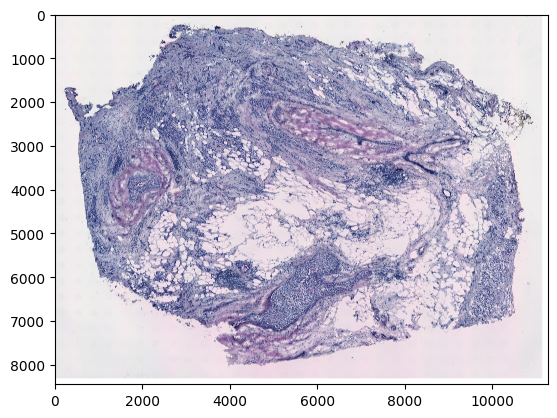

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
img = mpimg.imread('he.jpg')
print(img.shape)

# Display the image
imgplot = plt.imshow(img)
plt.show()

/ssd/users/yuanhua/envs/PyTch/lib/python3.12/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (92651520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


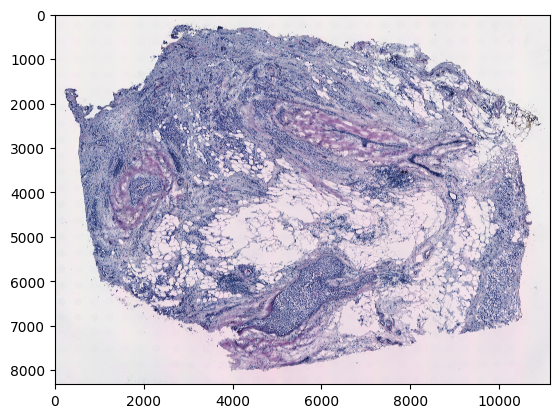

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
img = mpimg.imread('he-scaled.jpg')

# Display the image
imgplot = plt.imshow(img)
plt.show()

In [19]:
img.shape

(8320, 11136, 3)

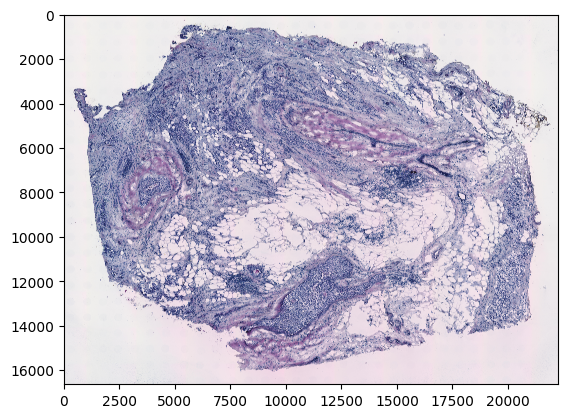

In [20]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

img = Image.open('he-raw.jpg')
img = np.array(img)

# Display the image
imgplot = plt.imshow(img)
plt.show()

In [21]:
img.shape

(16640, 22272, 3)